In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dummy videos data
np.random.seed(42)
n_videos = 100
videos_data = {
    'video_id': [f'V{i:03d}' for i in range(1, n_videos + 1)],
    'title': [f'Video Tutorial {i}' for i in range(1, n_videos + 1)],
    'publish_date': pd.date_range(end=pd.Timestamp.today(), periods=n_videos).to_list(),
    'views': np.random.randint(1000, 50000, n_videos),
    'likes': np.random.randint(100, 3000, n_videos),
    'comment_count': np.random.randint(10, 500, n_videos),
    'category': np.random.choice(['Education', 'Tech', 'Travel', 'Lifestyle'], n_videos)
}
df_videos = pd.DataFrame(videos_data)


In [3]:
# Dummy comments data
comments_list = [
    "Great video!", "Loved the explanation.", "Could be better.", "Didn't understand the part on pandas.",
    "Awesome tutorial!", "Not helpful.", "Thanks for sharing.", "Very clear and concise.", "Too fast paced.", "Perfect!"
]
comments_data = {
    'video_id': np.random.choice(df_videos['video_id'], 500),
    'comment_text': np.random.choice(comments_list, 500),
}
df_comments = pd.DataFrame(comments_data)


In [4]:
# Basic rule-based sentiment proxy using keyword lists
positive_words = ['great', 'loved', 'awesome', 'thanks', 'perfect', 'clear', 'helpful']
negative_words = ['not', 'could', 'didn\'t', 'too', 'confusing']

def sentiment_proxy(text):
    text_lower = text.lower()
    pos_score = sum(word in text_lower for word in positive_words)
    neg_score = sum(word in text_lower for word in negative_words)
    return pos_score - neg_score

df_comments['sentiment_proxy'] = df_comments['comment_text'].apply(sentiment_proxy)

# Aggregate sentiment per video (mean sentiment proxy)
video_sentiment = df_comments.groupby('video_id')['sentiment_proxy'].mean().reset_index()
video_sentiment.rename(columns={'sentiment_proxy': 'avg_sentiment_proxy'}, inplace=True)


In [8]:
    # Merge with videos dataframe
    df['avg_sentiment_proxy'] = df['avg_sentiment_proxy'].fillna(0)

In [9]:
# Engagement score
df['engagement_score'] = (df['likes'] + df['comment_count']) / df['views']


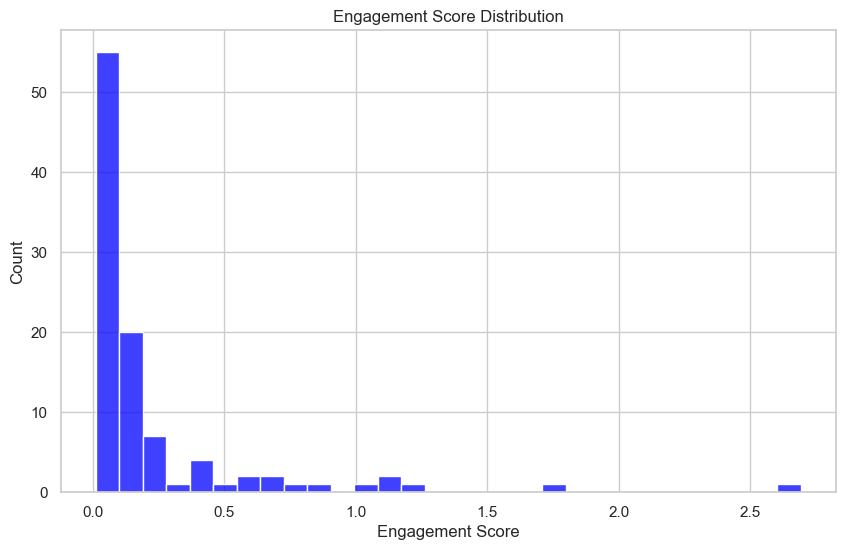

In [11]:
# Visualizations (same as before, just replacing avg_sentiment with avg_sentiment_proxy)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.histplot(df['engagement_score'], bins=30, color='blue')
plt.title('Engagement Score Distribution')
plt.xlabel('Engagement Score')
plt.ylabel('Count')
plt.show()




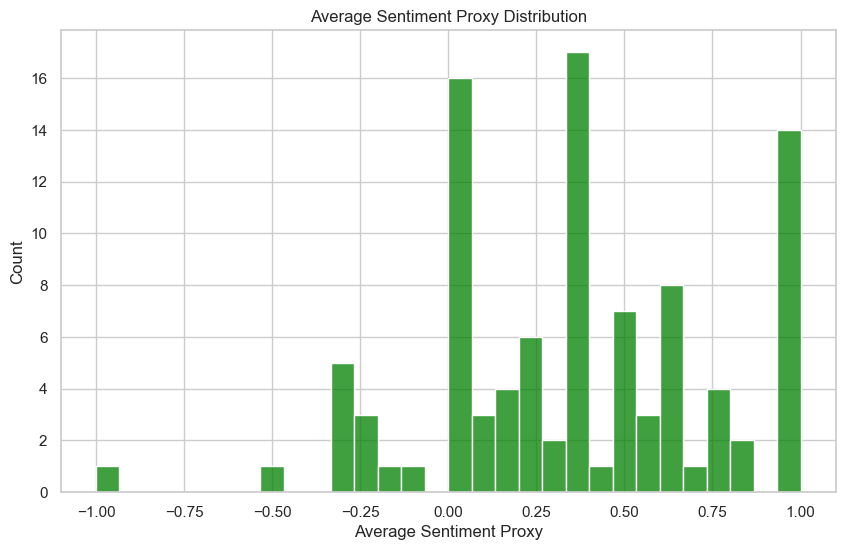

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['avg_sentiment_proxy'], bins=30, color='green')
plt.title('Average Sentiment Proxy Distribution')
plt.xlabel('Average Sentiment Proxy')
plt.ylabel('Count')
plt.show()



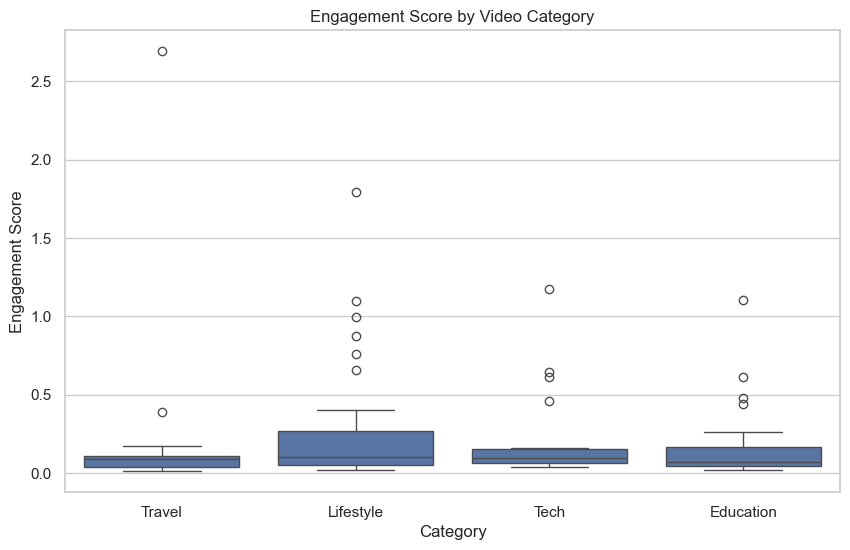

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category', y='engagement_score', data=df)
plt.title('Engagement Score by Video Category')
plt.xlabel('Category')
plt.ylabel('Engagement Score')
plt.show()



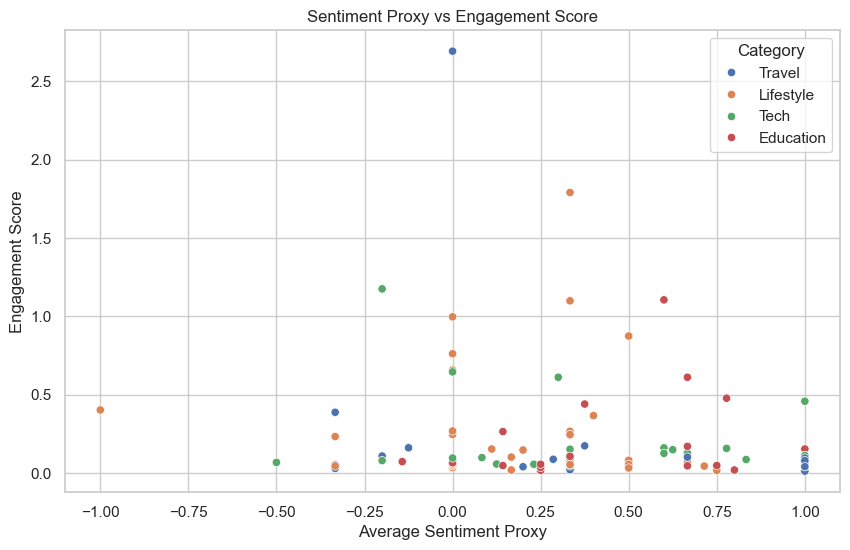

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_sentiment_proxy', y='engagement_score', data=df, hue='category')
plt.title('Sentiment Proxy vs Engagement Score')
plt.xlabel('Average Sentiment Proxy')
plt.ylabel('Engagement Score')
plt.legend(title='Category')
plt.show()



In [16]:
df['publish_date'] = pd.to_datetime(df['publish_date'])
engagement_over_time = df.groupby('publish_date')['engagement_score'].mean()



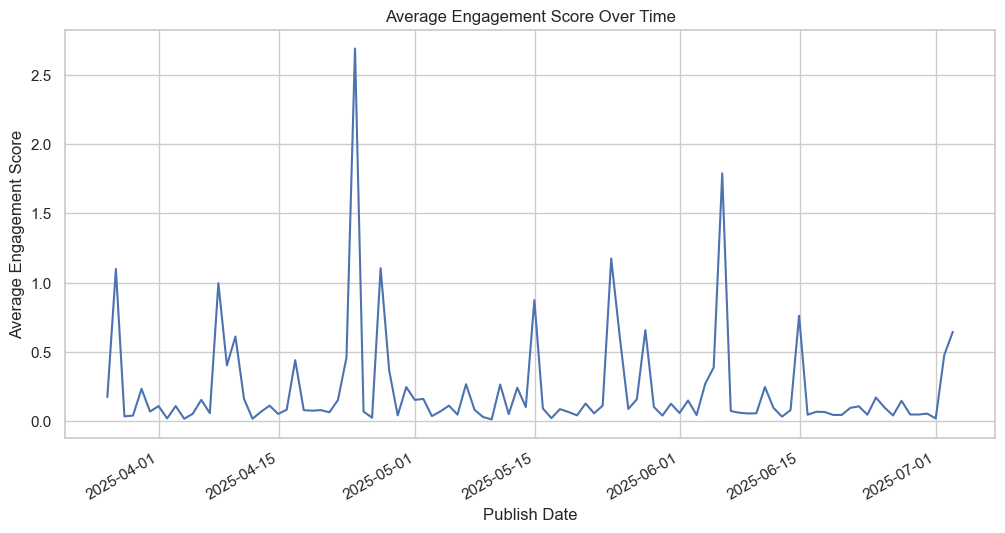

In [17]:
plt.figure(figsize=(12,6))
engagement_over_time.plot()
plt.title('Average Engagement Score Over Time')
plt.xlabel('Publish Date')
plt.ylabel('Average Engagement Score')
plt.grid(True)
plt.show()

In [18]:
# Summary stats
summary_stats = df.groupby('category').agg({
    'views': ['mean', 'sum'],
    'likes': ['mean', 'sum'],
    'comment_count': ['mean', 'sum'],
    'engagement_score': 'mean',
    'avg_sentiment_proxy': 'mean'
}).round(3)

print("\nSummary Statistics by Category:")
print(summary_stats)



Summary Statistics by Category:
               views             likes        comment_count        \
                mean     sum      mean    sum          mean   sum   
category                                                            
Education  24728.769  642948  1589.154  41318       277.462  7214   
Lifestyle  19922.324  677359  1630.765  55446       253.882  8632   
Tech       21247.391  488690  1771.174  40737       281.174  6467   
Travel     27194.059  462299  1716.235  29176       248.118  4218   

          engagement_score avg_sentiment_proxy  
                      mean                mean  
category                                        
Education            0.172               0.405  
Lifestyle            0.284               0.265  
Tech                 0.204               0.461  
Travel               0.249               0.286  
